In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# ============================================
# EDA ON CLEANED DATASET (KAGGLE VERSION)
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Path for Kaggle working directory
clean_path = "/kaggle/input/dataset-01/original_csv.csv"

# Load cleaned dataset
df = pd.read_csv(clean_path)

print("Dataset Loaded ✔ from:", clean_path)
df.head()


Dataset Loaded ✔ from: /kaggle/input/dataset-01/original_csv.csv


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Estimated_Serving_Weight_g
0,Scrambled Eggs (2 large),Protein/Dairy,180,12.0,2.0,14.0,0.0,1.0,180,370,Breakfast,250,116.1
1,Whole Wheat Toast (1 slice),Grain,80,4.0,14.0,1.0,2.0,2.0,140,0,Breakfast,0,30.2
2,Coffee (black),Beverage,5,0.3,0.0,0.1,0.0,0.0,5,0,Breakfast,0,500.0
3,Banana,Fruit,105,1.3,27.0,0.4,3.1,14.0,1,0,Breakfast,0,118.0
4,Grilled Chicken Salad,Meal/Protein,350,30.0,10.0,20.0,5.0,4.0,400,80,Lunch,500,233.3


In [2]:
print("=== SHAPE ===")
df.shape


=== SHAPE ===


(645, 13)

In [3]:
print("=== COLUMNS ===")
df.columns


=== COLUMNS ===


Index(['Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)',
       'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)',
       'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Water_Intake (ml)',
       'Estimated_Serving_Weight_g'],
      dtype='object')

In [4]:
print("=== INFO ===")
df.info()


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food_Item                   645 non-null    object 
 1   Category                    645 non-null    object 
 2   Calories (kcal)             645 non-null    int64  
 3   Protein (g)                 645 non-null    float64
 4   Carbohydrates (g)           645 non-null    float64
 5   Fat (g)                     645 non-null    float64
 6   Fiber (g)                   645 non-null    float64
 7   Sugars (g)                  645 non-null    float64
 8   Sodium (mg)                 645 non-null    int64  
 9   Cholesterol (mg)            645 non-null    int64  
 10  Meal_Type                   645 non-null    object 
 11  Water_Intake (ml)           645 non-null    int64  
 12  Estimated_Serving_Weight_g  645 non-null    float64
dtypes: float64(6), int64(4

In [5]:
print("=== DESCRIPTIVE STATS ===")
df.describe(include="all")


=== DESCRIPTIVE STATS ===


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Estimated_Serving_Weight_g
count,645,645,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645,645.000000,645.000000
unique,587,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,Tzatziki Sauce (2 tbsp),Condiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dinner,NaN,NaN
freq,3,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224,NaN,NaN
mean,NaN,NaN,146.294574,6.300620,15.435194,6.469612,1.702481,5.294264,246.331783,20.482171,NaN,68.700775,130.092403
std,NaN,NaN,139.984360,8.782683,16.349230,8.142916,2.121275,8.537343,308.472431,43.560072,NaN,137.077115,485.539668
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,42.000000,0.500000,1.300000,0.200000,0.000000,0.400000,5.000000,0.000000,NaN,0.000000,28.300000
50%,NaN,NaN,105.000000,2.700000,9.200000,3.000000,1.000000,2.000000,120.000000,0.000000,NaN,0.000000,69.300000
75%,NaN,NaN,200.000000,7.000000,27.000000,10.000000,3.000000,6.000000,350.000000,25.000000,NaN,0.000000,133.300000


In [6]:
num_cols = [
    "Calories (kcal)", "Protein (g)", "Carbohydrates (g)", "Fat (g)",
    "Sugars (g)", "Fiber (g)", "Sodium (mg)", "Estimated_Serving_Weight_g"
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Estimated_Serving_Weight_g
0,Scrambled Eggs (2 large),Protein/Dairy,180,12.0,2.0,14.0,0.0,1.0,180,370,Breakfast,250,116.1
1,Whole Wheat Toast (1 slice),Grain,80,4.0,14.0,1.0,2.0,2.0,140,0,Breakfast,0,30.2
2,Coffee (black),Beverage,5,0.3,0.0,0.1,0.0,0.0,5,0,Breakfast,0,500.0
3,Banana,Fruit,105,1.3,27.0,0.4,3.1,14.0,1,0,Breakfast,0,118.0
4,Grilled Chicken Salad,Meal/Protein,350,30.0,10.0,20.0,5.0,4.0,400,80,Lunch,500,233.3


In [7]:
print("=== Missing Values ===")
df.isnull().sum()


=== Missing Values ===


Food_Item                     0
Category                      0
Calories (kcal)               0
Protein (g)                   0
Carbohydrates (g)             0
Fat (g)                       0
Fiber (g)                     0
Sugars (g)                    0
Sodium (mg)                   0
Cholesterol (mg)              0
Meal_Type                     0
Water_Intake (ml)             0
Estimated_Serving_Weight_g    0
dtype: int64

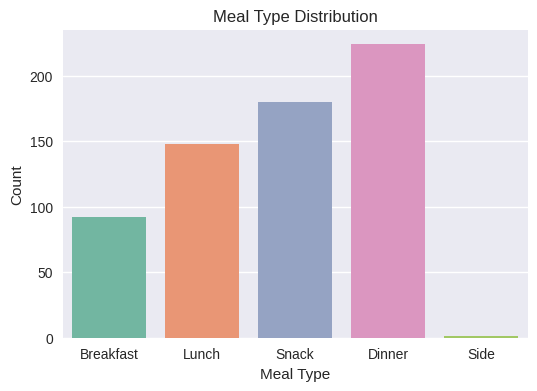

In [8]:
if "Meal_Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Meal_Type", data=df)
    plt.title("Meal Type Distribution")
    plt.xlabel("Meal Type")
    plt.ylabel("Count")
    plt.show()


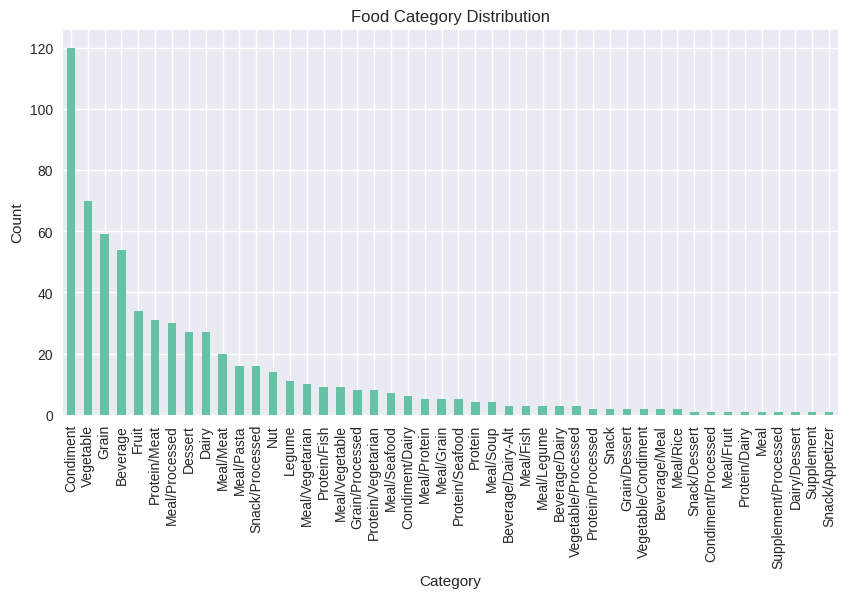

In [9]:
if "Category" in df.columns:
    plt.figure(figsize=(10,5))
    df["Category"].value_counts().plot(kind="bar")
    plt.title("Food Category Distribution")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()


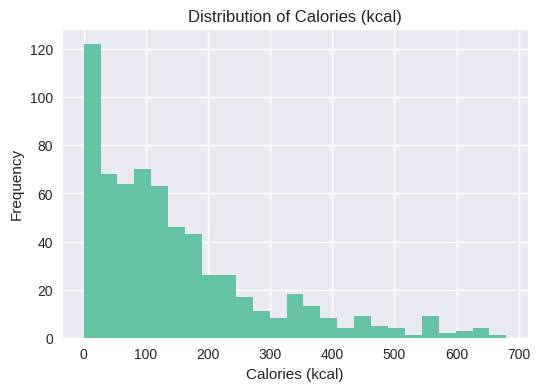

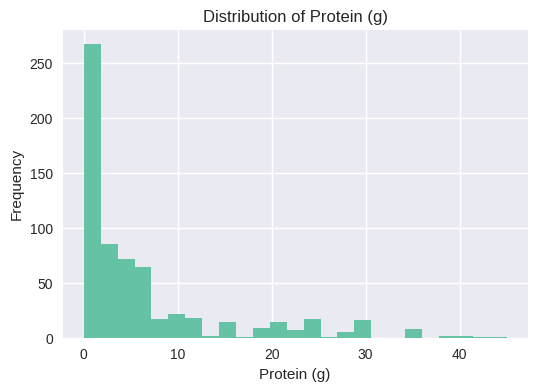

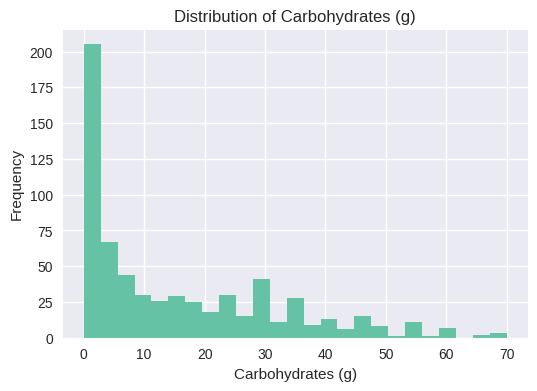

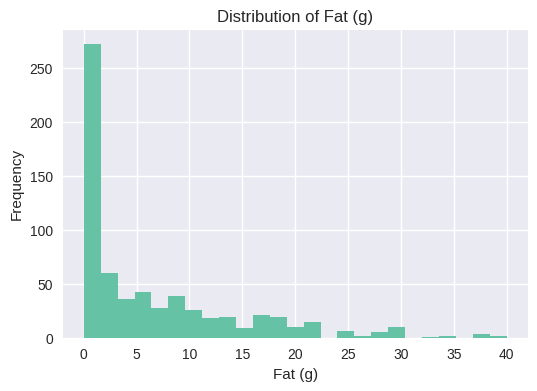

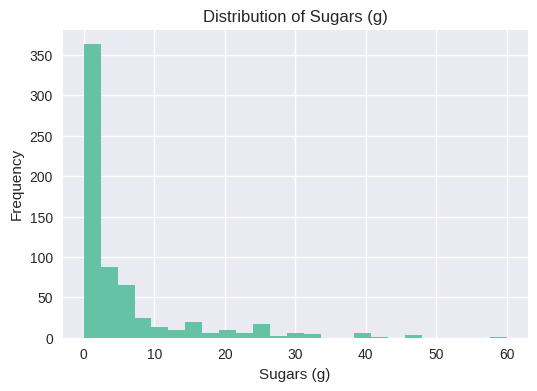

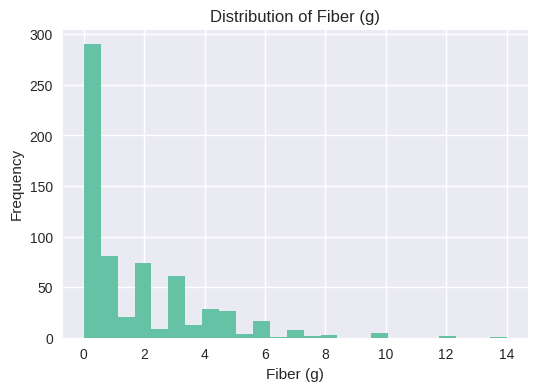

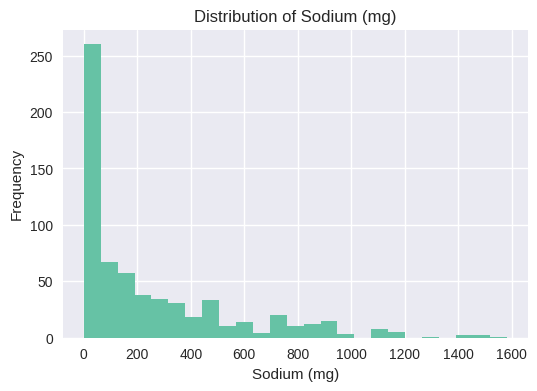

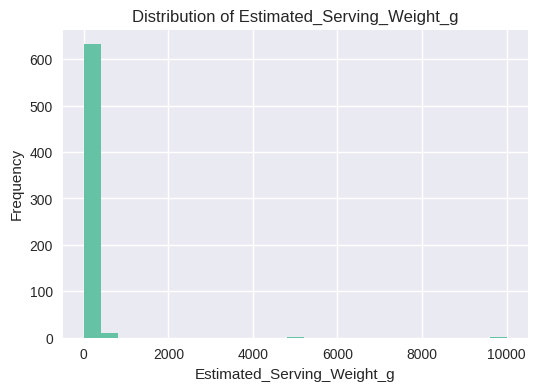

In [10]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=25)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


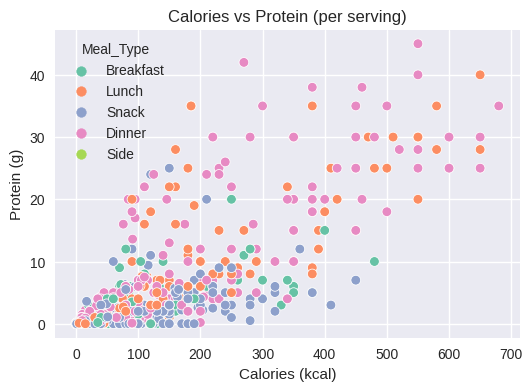

In [11]:
if {"Calories (kcal)", "Protein (g)"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=df["Calories (kcal)"],
        y=df["Protein (g)"],
        hue=df["Meal_Type"] if "Meal_Type" in df.columns else None
    )
    plt.title("Calories vs Protein (per serving)")
    plt.xlabel("Calories (kcal)")
    plt.ylabel("Protein (g)")
    plt.show()


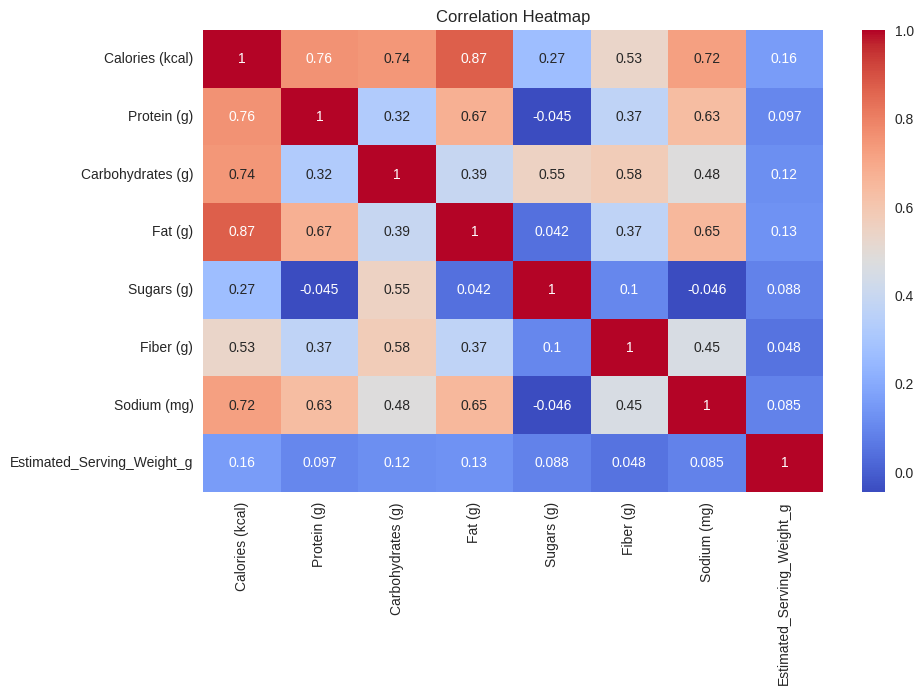

In [12]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
